# Gear dataset

Test and display mask loading

In [2]:
import os
import sys
import numpy as np

ROOT_DIR = os.path.abspath("../../")

sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model as modellib
from mrcnn.model import log

import gear

In [3]:
##DATASET_DIR = os.path.join(ROOT_DIR, "datasets/gear")
DATASET_DIR = "C:\\Users\\Duje\\Desktop\\fortitudo\\2. fraunhofer\\zadatak\\2022-01 Inspection Planning ML PhD\\Gear\\Synthetic Images"

class NoResizeConfig(gear.GearConfig):
  IMAGE_RESIZE_MODE = "none"

config = NoResizeConfig()

In [4]:
dataset = gear.GearDataset()
dataset.load_gear(DATASET_DIR, subset="val")

dataset.prepare()
print(dataset.image_ids)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]


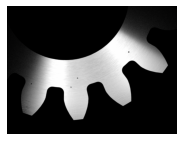

In [5]:
source_id = "6_render_9"

image_id = dataset.image_from_source_map["gear.{}".format(source_id)]
image = dataset.load_image(image_id)

visualize.display_images([image])

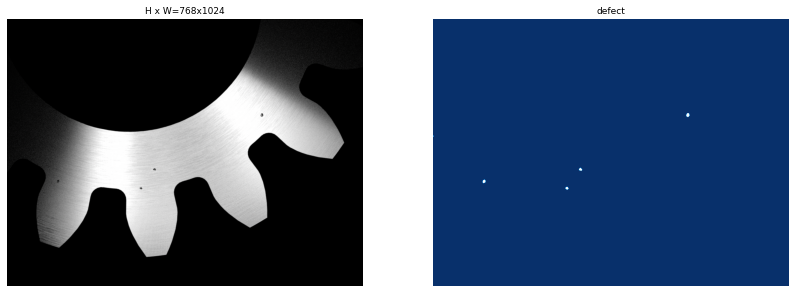

In [6]:
mask, class_ids = dataset.load_mask(image_id)

visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=1)

molded_image             shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (768, 1024, 1)        min:    0.00000  max:    1.00000  bool
(1, 4)


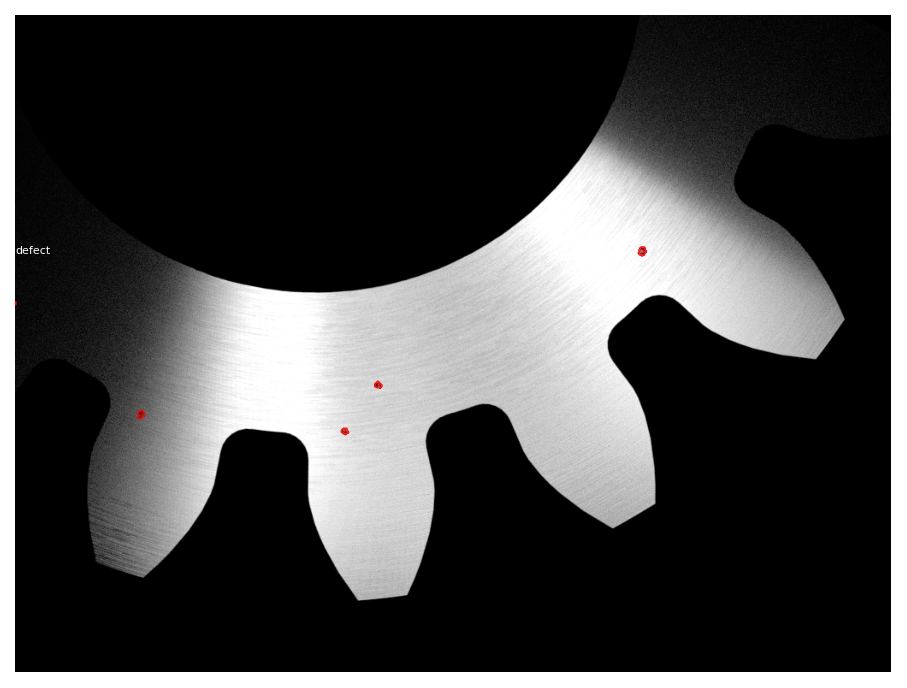

In [7]:
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False)

log("molded_image", image)
log("mask", mask)
log(bbox.shape)

visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names,
                            show_bbox=False)